In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz

file_path = 'C:\Users\USER\Documents\Amikom\Artificial Intelligence\code\Dataset_Kaggle.xlsx'  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

dataset = pd.DataFrame(df)
dataset.head(100)

,Combined
0,"6,148,72,35,0,33.6,0.627,50,1"
1,"1,85,66,29,0,26.6,0.351,31,0"
2,"8,183,64,0,0,23.3,0.672,32,1"
3,"1,89,66,23,94,28.1,0.167,21,0"
4,"0,137,40,35,168,43.1,2.288,33,1"
...,...
95,"6,144,72,27,228,33.9,0.255,40,0"
96,"2,92,62,28,0,31.6,0.13,24,0"
97,"1,71,48,18,76,20.4,0.323,22,0"
98,"6,93,50,30,64,28.7,0.356,23,0"


In [6]:
split_columns = df['Combined'].str.split(',', expand=True)

header_names = ['Pregnancies Month','Glucose (mg)', 'Blood Pressure (mmHg)', 'Skin Thickness (mm)', 'Insulin (pmol/L)','BMI','Diabetes Pedigree Function (e.g 0.49)','Age','Outcome']  # Ganti dengan nama header yang diinginkan
split_columns.columns = header_names[:split_columns.shape[1]]  # Sesuaikan jumlah header dengan jumlah kolom hasil split

df_split = pd.concat([df, split_columns], axis=1)

df_split = df_split.drop('Combined', axis=1)


df_split.head(100)


,Pregnancies Month,Glucose (mg),Blood Pressure (mmHg),Skin Thickness (mm),Insulin (pmol/L),BMI,Diabetes Pedigree Function (e.g 0.49),Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.13,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [8]:
X = df_split.drop(columns=['Outcome']) 
y = df_split['Outcome'] 
X.head()

,Pregnancies Month,Glucose (mg),Blood Pressure (mmHg),Skin Thickness (mm),Insulin (pmol/L),BMI,Diabetes Pedigree Function (e.g 0.49),Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head(100)

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
95,0
96,0
97,0
98,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)
y_pred

array(['0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0'],
      dtype=object)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Model: 0.7207792207792207

Confusion Matrix:
[[77 22]
 [21 34]]


In [13]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFitur Penting:")
print(feature_importances)


Fitur Penting:
                                 Feature  Importance
1                           Glucose (mg)    0.258864
5                                    BMI    0.169984
7                                    Age    0.140931
6  Diabetes Pedigree Function (e.g 0.49)    0.123768
2                  Blood Pressure (mmHg)    0.088134
0                      Pregnancies Month    0.076551
4                       Insulin (pmol/L)    0.076122
3                    Skin Thickness (mm)    0.065646


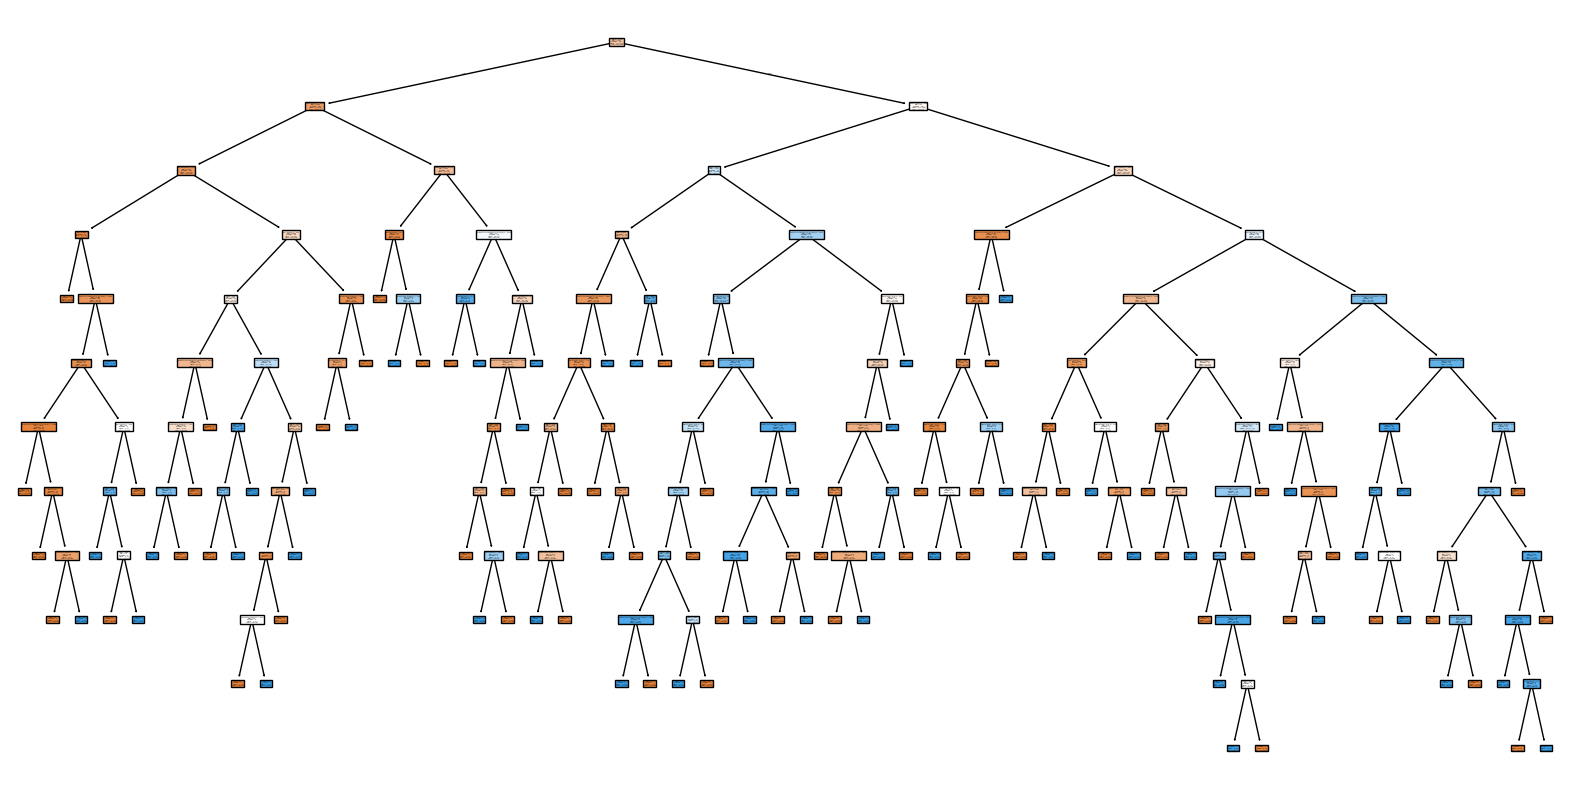

In [14]:
def visualize_random_forest_tree():
    tree = model.estimators_[0]

    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=feature_names,
                               class_names=["Negative", "Positive"],
                               filled=True, rounded=True,
                               special_characters=True)

    graph = graphviz.Source(dot_data)
    graph.render("random_forest_tree") 
    graph.view() 

    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, class_names=["Negative", "Positive"], filled=True)
    plt.show()
visualize_random_forest_tree()

In [15]:
def simulate_patient_input():
    print("\nMasukkan data pasien:")
    input_data = []
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_data.append(value)

    input_df = pd.DataFrame([input_data], columns=feature_names)

    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0]

    print("\nHasil Prediksi:")
    if prediction == 1:
        print("Pasien diprediksi POSITIF diabetes.")
    else:
        print("Pasien diprediksi NEGATIF diabetes.")

    print("\nProbabilitas:")
    print(f"Negatif: {probability[0] * 100:.2f}%")
    print(f"Positif: {probability[1] * 100:.2f}%")

simulate_patient_input()


Masukkan data pasien:
Pregnancies Month: 4
Glucose (mg): 12
Blood Pressure (mmHg): 123
Skin Thickness (mm): 11
Insulin (pmol/L): 24
BMI: 11
Diabetes Pedigree Function (e.g 0.49): 0.34
Age: 59

Hasil Prediksi:
Pasien diprediksi NEGATIF diabetes.

Probabilitas:
Negatif: 72.00%
Positif: 28.00%
